### 引入資料

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# pandas 模組可以直接處理excell檔案
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/colabData/weather.csv')
print(data.head(5))
print("=================================================================")
print(data.columns)

   MinTemp  MaxTemp  Rainfall  ...  Label  RISK_MM RainTomorrow
0      8.0     24.3       0.0  ...      0      3.6          Yes
1     14.0     26.9       3.6  ...      1      3.6          Yes
2     13.7     23.4       3.6  ...      1     39.8          Yes
3     13.3     15.5      39.8  ...      1      2.8          Yes
4      7.6     16.1       2.8  ...      1      0.0           No

[5 rows x 23 columns]
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Label', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


### 說明: Pandas 轉 numpy array

In [ ]:
# Look the follwing sample
x1 = data["MinTemp"] # 提供column name 作為data 的索引
print(type(x1)) # 資料型態仍為pandas

import numpy as np # numpy 可參考 AIworkshop-sample0205 範例
x1 = np.array(x1, dtype='float64') #numpy 可直接接收 pandas series 
print(type(x1))
print(x1[:5])

x1 = x1.reshape((x1.shape[0],1)) # 類似 AIworkshop-sample0401 範例，轉成2維矩陣
print(x1[:5])

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[ 8.  14.  13.7 13.3  7.6]
[[ 8. ]
 [14. ]
 [13.7]
 [13.3]
 [ 7.6]]


In [ ]:
# 試著讀取其他數據
import numpy as np
x2 = np.array(data["MaxTemp"], dtype='float64')
x2 = x2.reshape((x2.shape[0],1))
print(x2[:5])


[[24.3]
 [26.9]
 [23.4]
 [15.5]
 [16.1]]


In [ ]:
# 試著合併x1 & x2
x = np.concatenate([x1, x2], axis=1)
print(x[:5])

[[ 8.  24.3]
 [14.  26.9]
 [13.7 23.4]
 [13.3 15.5]
 [ 7.6 16.1]]


### 將pandas 轉 Numpy array

In [102]:
import numpy as np

# 做出第一個特徵的矩陣
x = np.array(data["MinTemp"], dtype='float64')
x = x.reshape((x.shape[0],1))

# 做出第二個特徵的矩陣，暫存在tempArray，並與x_train合併
tempArray = np.array(data["MaxTemp"], dtype='float64')
tempArray = tempArray.reshape((tempArray.shape[0],1))
x = np.concatenate([x, tempArray], axis=1)

# 做出第三個特徵的矩陣，暫存在tempArray，並與x_train合併
tempArray = np.array(data["Pressure3pm"], dtype='float64')
tempArray = tempArray.reshape((tempArray.shape[0],1))
x = np.concatenate([x, tempArray], axis=1)

# 做出第四個特徵的矩陣，暫存在tempArray，並與x_train合併
tempArray = np.array(data["Pressure9am"], dtype='float64')
tempArray = tempArray.reshape((tempArray.shape[0],1))
x = np.concatenate([x, tempArray], axis=1)

print(x[:5])

[[   8.    24.3 1015.  1019.7]
 [  14.    26.9 1008.4 1012.4]
 [  13.7   23.4 1007.2 1009.5]
 [  13.3   15.5 1007.  1005.5]
 [   7.6   16.1 1018.5 1018.3]]


In [103]:
y = np.array(data["Label"], dtype='int64')
y = y.reshape((y.shape[0],1))
print(y[:5])

[[0]
 [1]
 [1]
 [1]
 [1]]


### 產出測試集與訓練集

In [104]:
from sklearn.model_selection import train_test_split

print(x.shape)
print(y.shape)
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.05)

print(x_test.shape)
print(y_test.shape)

(356, 4)
(356, 1)
(18, 4)
(18, 1)


### 將Label資料轉成單熱編碼

In [105]:
import tensorflow as tf
y_train2 = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test2 = tf.keras.utils.to_categorical(y_test, num_classes=2)

### 建立模型

In [106]:
"""
activation: https://keras.io/zh/activations/
"""
model = tf.keras.Sequential()
# input layer: 50個神經元, 激活函數使用relu, 輸入4維資料
model.add(tf.keras.layers.Dense(units=50,activation=tf.nn.relu,input_dim=4))
# hidden layer: 50個神經元, 激活函數使用relu
model.add(tf.keras.layers.Dense(units=50,activation=tf.nn.relu))
# output layer: 2個神經元(代表兩個結果), 激活函數使用softmax
model.add(tf.keras.layers.Dense(units=2,activation=tf.nn.softmax ))

"""
optimizaer: https://keras.io/zh/optimizers/
metrics: https://keras.io/zh/metrics/
loss: https://keras.io/zh/losses/
"""

#model.compile(optimizer='adam',
#       loss = tf.keras.losses.categorical_crossentropy,
#       metrics=['accuracy'])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 訓練模型

In [107]:
history = model.fit(x_train, y_train2, epochs=100, batch_size=64)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 38.1908 - accuracy: 0.8225
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 3.5785 - accuracy: 0.5799
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 3.7460 - accuracy: 0.7840
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 1.4422 - accuracy: 0.7485
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 1.3909 - accuracy: 0.6746
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 1.8599 - accuracy: 0.6302
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 2.3295 - accuracy: 0.7929
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 2.5317 - accuracy: 0.7278
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 1.6531 - accuracy: 0.5917
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 2.3509 - accuracy: 0.8195
Epoch 11/100
6/6 [==========

### 評估模型

In [108]:
score = model.evaluate(x_test, y_test2)
print("score:",score)

1/1 [==============================] - 0s 142ms/step - loss: 0.4882 - accuracy: 0.7778
score: [0.48818185925483704, 0.7777777910232544]


In [109]:
loss = np.array(history.history['loss'], dtype='float64')
loss = loss/max(loss)

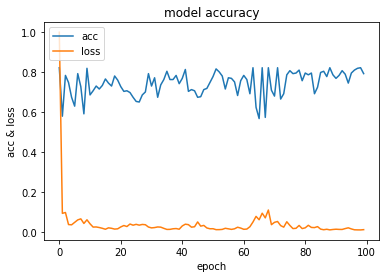

In [110]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(loss)
plt.title('model accuracy')
plt.ylabel('acc & loss')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

### 預測

In [111]:
predict = model.predict(x_test)

print("第一個測試資料:", x_test[0])
print("不下雨 機率:",predict[0][0])
print("下雨 機率:",predict[0][1])
if(np.argmax(predict[0]) == 0):
  print("預測; 不下雨")
else:
  print("預測: 下雨")
  
print(y_test2[0])

第一個測試資料: [   9.2   20.4 1009.1 1009.5]
不下雨 機率: 0.91890424
下雨 機率: 0.08109576
預測; 不下雨
[0. 1.]
